# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

- 下載CIFAR100資料集
- 切分訓練與測試集
- 檢視資料集shape
- 把部份圖像資料呈現出來

In [2]:
(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 365s 2us/step


In [5]:
print(x_img_train.shape)
print(y_label_train.shape)
print(x_img_test.shape)
print(y_label_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 這裡用的繪圖方式

- fix, ax = plt.subplots()：定義幾列幾欄
- 用ax.flatten() 壓成一維陣列，方便之後用一層迴圈來指向每一格
- 每一格用imshow

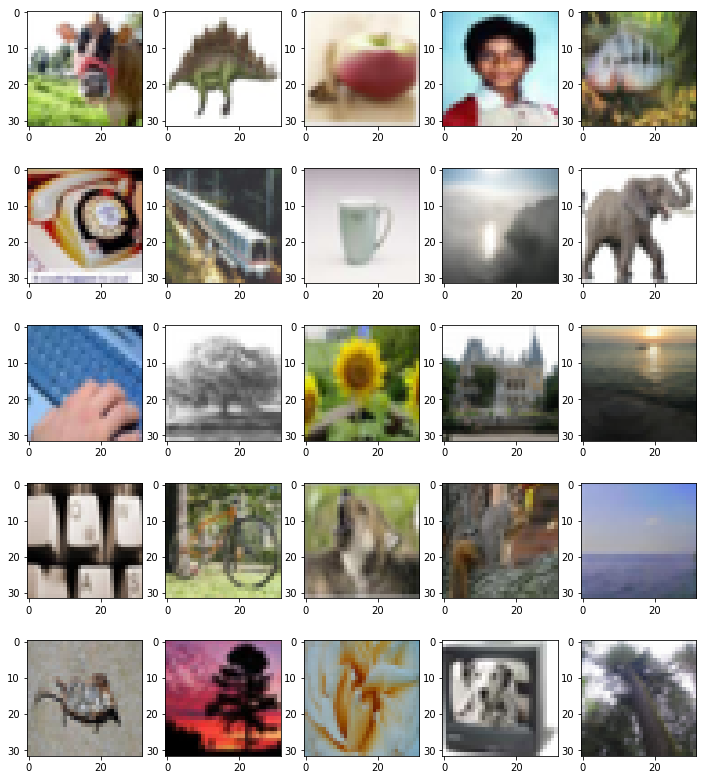

In [12]:
# 秀圖
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 14)
axes = ax.flatten()

for i in range(25):
    axes[i].imshow(x_img_train[i],cmap='binary')

# Image normalize 

In [16]:
# 每一張圖是32 x 32個像素，每個像素是三個(RGB)0~255的值
print(x_img_train[0][0])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 252 248]
 [231 222 213]
 [176 168 163]
 [237 236 235]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [252 255 255]
 [242 252 252]
 [229 240 234]
 [195 205 193]
 [212 224 204]
 [182 194 167]]


In [21]:
# 所以一律除以255
x_img_train_normalized = x_img_train / 255.0
x_img_test_normalized = x_img_test / 255.0
x_img_train_normalized[0][0][0]

array([1., 1., 1.])

# 轉換label 為OneHot Encoding

sklearn有OneHotEncoder，而keras.utils裡的np_utils，有個to_categorical方法

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_label_train_encoded = enc.fit_transform(y_label_train).toarray()
print(y_label_train_encoded.shape)
print(type(y_label_train_encoded))
print(y_label_train_encoded[:5])

(50000, 100)
<class 'numpy.ndarray'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0